Dataset Overview:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500  

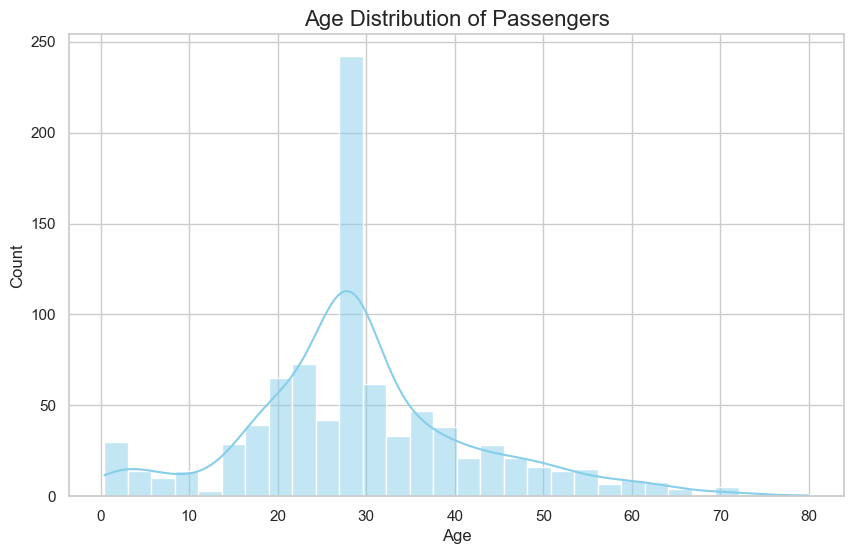

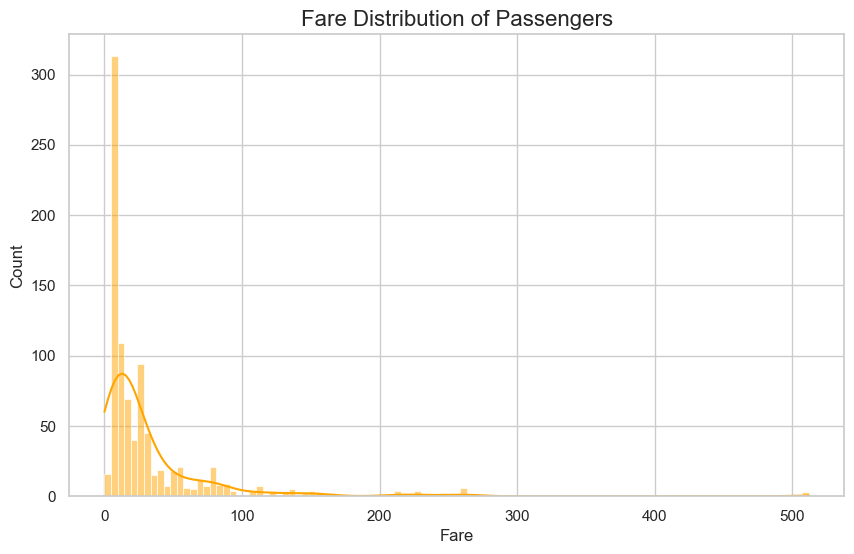

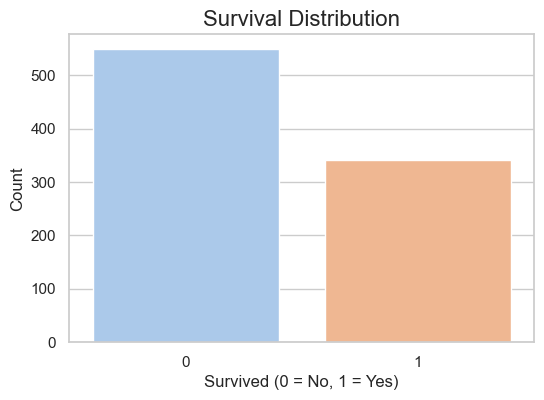

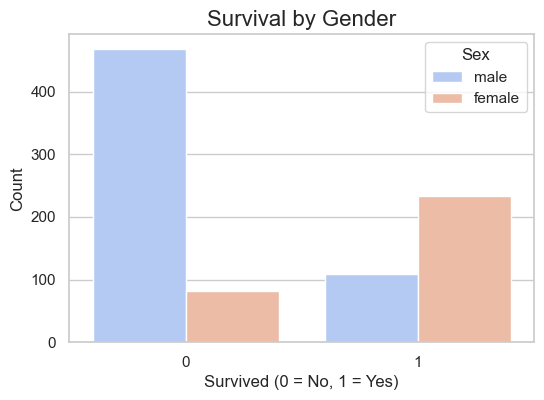

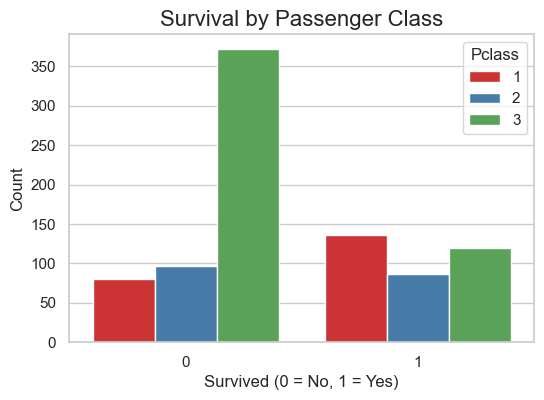

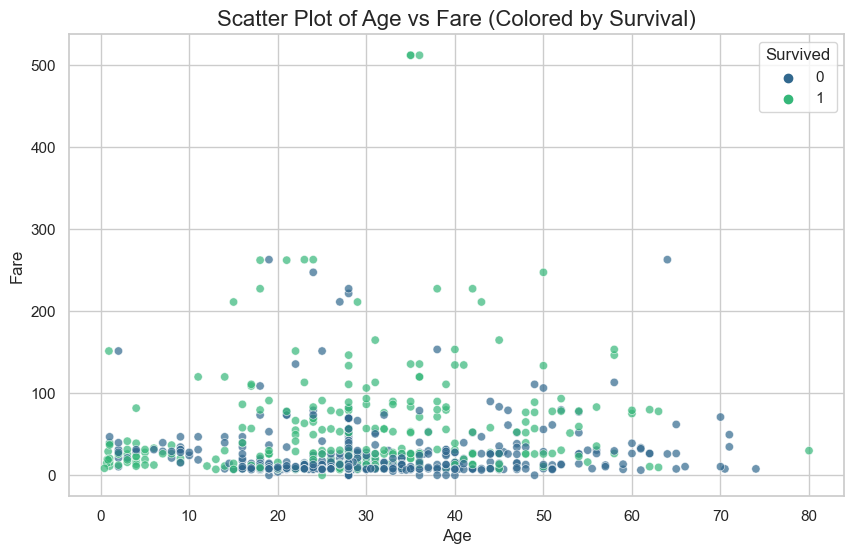

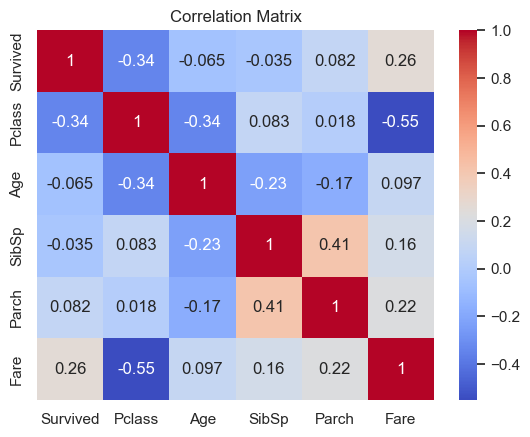

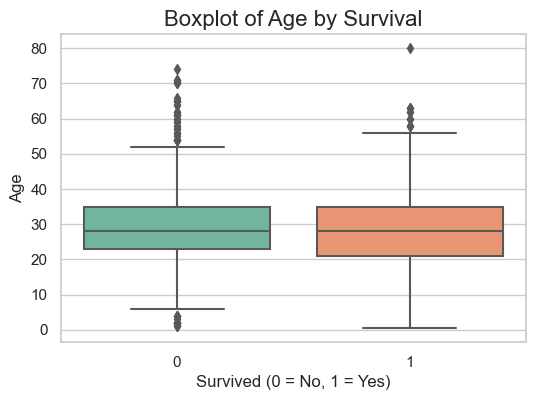

In [ ]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Titanic dataset
df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")  # Adjust the file path as necessary

# 1. Data Overview: Inspect the dataset
print("Dataset Overview:")
print(df.head())  # Show the first 5 rows
print(df.info())  # Show data types and non-null counts
print(df.describe())  # Summary statistics for numerical columns

# 2. Data Cleaning
# Handle missing values by imputing or removing
df['Age'].fillna(df['Age'].median(), inplace=True)  # Impute missing 'Age' with median
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)  # Impute missing 'Embarked' with mode
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)  # Drop irrelevant columns

# Check for missing values after cleaning
print("\nMissing Values After Cleaning:")
print(df.isnull().sum())

# 3. Univariate Analysis: Analyze individual features
# Age distribution (Histogram)
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, color='skyblue')
plt.title('Age Distribution of Passengers', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

# Fare distribution (Histogram)
plt.figure(figsize=(10, 6))
sns.histplot(df['Fare'], kde=True, color='orange')
plt.title('Fare Distribution of Passengers', fontsize=16)
plt.xlabel('Fare', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

# Survival distribution (Bar Plot)
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Survived', palette='pastel')
plt.title('Survival Distribution', fontsize=16)
plt.xlabel('Survived (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

# 4. Bivariate Analysis: Relationships between variables
# Survival by Gender (Bar Plot)
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Survived', hue='Sex', palette='coolwarm')
plt.title('Survival by Gender', fontsize=16)
plt.xlabel('Survived (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

# Survival by Class (Bar Plot)
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Survived', hue='Pclass', palette='Set1')
plt.title('Survival by Passenger Class', fontsize=16)
plt.xlabel('Survived (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

# Scatter plot for Age vs Fare (Colored by Survival)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Fare', hue='Survived', palette='viridis', alpha=0.7)
plt.title('Scatter Plot of Age vs Fare (Colored by Survival)', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Fare', fontsize=12)
plt.show()

# 5. Correlation Analysis
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


# 6. Outlier Detection
# Boxplot for Age by Survival
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='Survived', y='Age', palette='Set2')
plt.title('Boxplot of Age by Survival', fontsize=16)
plt.xlabel('Survived (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.show()

# Boxplot for Fare by Survival
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='Survived', y='Fare', palette='Set2')
plt.title('Boxplot of Fare by Survival', fontsize=16)
plt.xlabel('Survived (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Fare', fontsize=12)
plt.show()

